## Observations and Insights 

Observation 1: In the Capomulin specimens the weight and average tumor volumes are pretty highly correlated, this would suggest that tumor size is dependent on mouse size.



Observation 2: Ketapril had the highest mean tumor volume AND the highest stddev of tumor volume, even higher than the placebo.  It'd be interesting to see if the study was repeated again if this held up across multiple studies.  If it does then Ketapril may be worse for the mice than doing nothing.

Observation 3: Based on the ending tumor volume, it would appear that Capomulin and Ramicane are more effective than Infubinol and Ceftamin.  The first two's boxplots are much lower.  This still warrants further look at the starting volumes of the tumors to ensure each regimen had similar starting specimen.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_merge = pd.merge(left=study_results, right=mouse_metadata, left_on='Mouse ID', right_on='Mouse ID')

In [2]:
# Checking the number of mice in the DataFrame.
print(mouse_merge['Mouse ID'].count())
print(mouse_merge['Mouse ID'].nunique())

1893
249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_merge[mouse_merge.duplicated(['Mouse ID', 'Timepoint'])]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mouse = mouse_merge[mouse_merge['Mouse ID'] == 'g989']
dupe_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merge_start = mouse_merge[mouse_merge['Mouse ID'] != 'g989']
clean_merge = clean_merge_start.copy()

In [6]:
# Checking the number of mice in the clean DataFrame.
print(clean_merge['Mouse ID'].count())
print(clean_merge['Mouse ID'].nunique())
clean_merge.head()

1880
248


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stddev = clean_merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_merge.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary = {"Regimen" : ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"], "mean" : [40.675741141,52.5911718096068,52.8847951085955,55.2356376404787,54.3315646583333,54.0335807863536,52.32092986,40.2167450667105,54.2331491198895,53.2365065515934]}
summary_df = pd.DataFrame(summary,columns=["Regimen", "mean"])
summ_copy = summary_df.copy()
summary_df.set_index("Regimen", inplace = True)
summary_df['median'] = median
summary_df['variance'] = variance
summary_df['stddev'] = stddev
summary_df['sem'] = sem
summary_df
# This method is the most straightforward, creating multiple series and putting them all together at the end.

,mean,median,variance,stddev,sem
Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df

,mean,median,variance,stddev,sem
Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

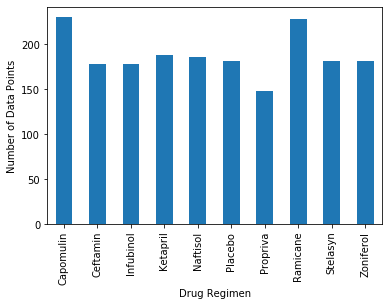

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
count_df = summ_copy.copy()
count_df["regimen2"] = count_df["Regimen"]
count_df.set_index("Regimen", inplace = True)
count_df['count'] = clean_merge.groupby('Drug Regimen')['Mouse ID'].count()
count_df['extra_col'] = 1
count_df = count_df[['count']]
count_df.plot(kind="bar", legend=False)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

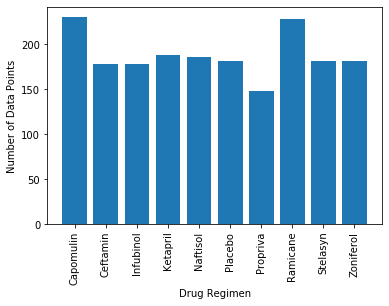

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
count_df = summ_copy.copy()
count_df["regimen2"] = count_df["Regimen"]
count_df.set_index("Regimen", inplace = True)
count_df['count'] = clean_merge.groupby('Drug Regimen')['Mouse ID'].count()
count_df['extra_col'] = 1
count_df = count_df[['count','extra_col','regimen2']]
reg_list = count_df['regimen2'].tolist()
count_list = count_df['count'].tolist()
x_axis = np.arange(10)
plt.bar(x_axis, count_list, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, reg_list, rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

## Pie Plots

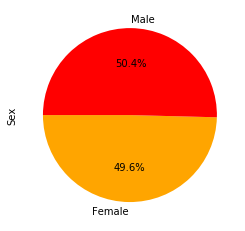

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_group = clean_merge.groupby('Sex')['Mouse ID'].nunique()
sex_df = sex_group.to_frame()
colors = ["orange", "red"]
sex_df.plot(kind="pie", y='Mouse ID',autopct="%1.1f%%",legend=False, colors=colors, startangle=180)
plt.ylabel("Sex")
plt.show()

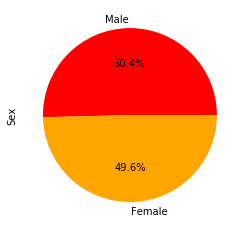

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
male_count = clean_merge[clean_merge['Sex'] == "Male"]['Mouse ID'].nunique()
female_count = clean_merge[clean_merge['Sex'] == "Female"]['Mouse ID'].nunique()
sizes = [male_count, female_count]
colors = ["red", "orange"]
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
clean_merge2 = clean_merge.sort_values(by=['Timepoint'], ascending=False).copy()
clean_merge2 = clean_merge2.drop_duplicates(subset=['Mouse ID'])
cap = clean_merge2[clean_merge2['Drug Regimen'] == 'Capomulin']
ram = clean_merge2[clean_merge2['Drug Regimen'] == 'Ramicane']
inf = clean_merge2[clean_merge2['Drug Regimen'] == 'Infubinol']
cef = clean_merge2[clean_merge2['Drug Regimen'] == 'Ceftamin']
quartiles = cap['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print("Quartile Statistics for Capomulin:")
print(f"The lower quartile is {lowerq}")
print(f"The upper quartile is {upperq}")
print(f"The IQR is {iqr}")
print("Below are the potential outliers:")
cur = cap
outliers = cur[(lowerq - cur['Tumor Volume (mm3)']) > (iqr*1.5)]
outliers.append(cur[(cur['Tumor Volume (mm3)'] - upperq) > (iqr*1.5)], ignore_index = True) 
print(outliers)

Quartile Statistics for Capomulin:
The lower quartile is 32.37735684
The upper quartile is 40.1592203
The IQR is 7.781863460000004
Below are the potential outliers:
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


In [14]:
quartiles = ram['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print("Quartile Statistics for Ramicane:")
print(f"The lower quartile is {lowerq}")
print(f"The upper quartile is {upperq}")
print(f"The IQR is {iqr}")
print("Below are the potential outliers:")
cur = ram
outliers = cur[(lowerq - cur['Tumor Volume (mm3)']) > (iqr*1.5)]
outliers.append(cur[(cur['Tumor Volume (mm3)'] - upperq) > (iqr*1.5)], ignore_index = True) 
print(outliers)

Quartile Statistics for Ramicane:
The lower quartile is 31.56046955
The upper quartile is 40.65900627
The IQR is 9.098536719999998
Below are the potential outliers:
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


In [15]:
quartiles = inf['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print("Quartile Statistics for Infubinol:")
print(f"The lower quartile is {lowerq}")
print(f"The upper quartile is {upperq}")
print(f"The IQR is {iqr}")
print("Below are the potential outliers:")
cur = inf
outliers = cur[(lowerq - cur['Tumor Volume (mm3)']) > (iqr*1.5)]
outliers.append(cur[(cur['Tumor Volume (mm3)'] - upperq) > (iqr*1.5)], ignore_index = True) 
print(outliers)

Quartile Statistics for Infubinol:
The lower quartile is 54.04860769
The upper quartile is 65.52574285
The IQR is 11.477135160000003
Below are the potential outliers:
    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
214     c326          5           36.321346                 0    Infubinol   

        Sex  Age_months  Weight (g)  
214  Female          18          25  


In [16]:
quartiles = cef['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print("Quartile Statistics for Ceftamin:")
print(f"The lower quartile is {lowerq}")
print(f"The upper quartile is {upperq}")
print(f"The IQR is {iqr}")
print("Below are the potential outliers:")
cur = cef
outliers = cur[(lowerq - cur['Tumor Volume (mm3)']) > (iqr*1.5)]
outliers.append(cur[(cur['Tumor Volume (mm3)'] - upperq) > (iqr*1.5)], ignore_index = True) 
print(outliers)

Quartile Statistics for Ceftamin:
The lower quartile is 48.72207785
The upper quartile is 64.29983003
The IQR is 15.577752179999997
Below are the potential outliers:
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


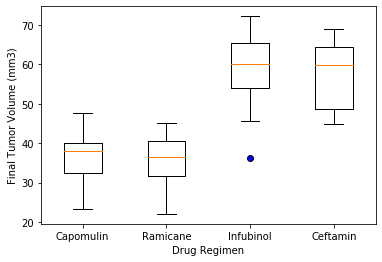

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
cap_list = cap['Tumor Volume (mm3)'].tolist()
ram_list = ram['Tumor Volume (mm3)'].tolist()
inf_list = inf['Tumor Volume (mm3)'].tolist()
cef_list = cef['Tumor Volume (mm3)'].tolist()

cap = clean_merge2[clean_merge2['Drug Regimen'] == 'Capomulin']
ram = clean_merge2[clean_merge2['Drug Regimen'] == 'Ramicane']
inf = clean_merge2[clean_merge2['Drug Regimen'] == 'Infubinol']
cef = clean_merge2[clean_merge2['Drug Regimen'] == 'Ceftamin']
blue_circle = dict(markerfacecolor='b', marker='o')
fig1, ax1 = plt.subplots()
ax1.boxplot([cap_list, ram_list, inf_list, cef_list],flierprops=blue_circle)
plt.xticks([1,2,3,4], ['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

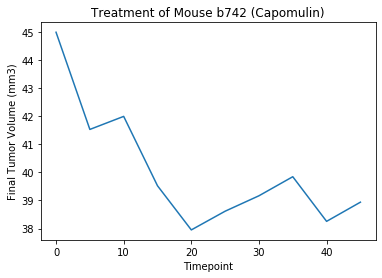

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_b742 = clean_merge[clean_merge["Mouse ID"] == 'b742'].copy()
mouse_b742.plot(kind="line",x='Timepoint',y='Tumor Volume (mm3)',legend=False)
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Treatment of Mouse b742 (Capomulin)")
plt.show()

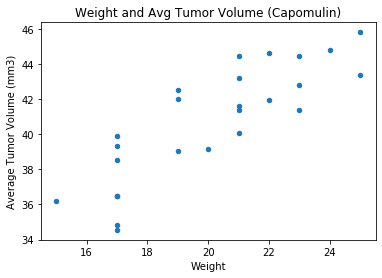

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_reg = clean_merge[clean_merge["Drug Regimen"] == 'Capomulin'].copy()
cap_test = cap_reg.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
cap_frame = cap_test.to_frame()
cap_frame["Weight"] = cap_reg.groupby("Mouse ID")["Weight (g)"].first()
cap_frame.plot(kind="scatter",x='Weight',y='Tumor Volume (mm3)',legend=False)
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight and Avg Tumor Volume (Capomulin)")
plt.show()

## Correlation and Regression

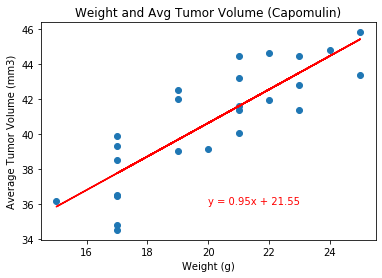

The correlation between both factors is 0.84


In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = cap_frame['Weight']
y_values = cap_frame['Tumor Volume (mm3)']
correlation = st.pearsonr(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=10,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Weight and Avg Tumor Volume (Capomulin)")
plt.show()
print(f"The correlation between both factors is {round(correlation[0],2)}")